Importing Keras libraries

In [ ]:
import keras

Importing ImageDataGenerator from Keras


In [ ]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Defining the Parameters


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)

Applying ImageDataGenerator functionality to train dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Collection',target_size=(64,64),batch_size=32,class_mode='binary')


Found 75 images belonging to 2 classes.


Applying ImageDataGenerator functionality to test dataset


In [ ]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Collection',target_size=(64,64),batch_size=32,class_mode='binary')


Found 75 images belonging to 2 classes.


Importing Model Building Libraries


In [ ]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

Initializing the model


In [ ]:
model = Sequential()


Adding CNN Layers


In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

Add Dense layers


In [ ]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

configuring the learning process


In [ ]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])


Training the model


In [ ]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)


Epoch 1/10
 3/14 [=====>........................] - ETA: 33s - loss: 3.2589 - accuracy: 0.4933

14/14 [==============================] - 12s 572ms/step - loss: 3.2589 - accuracy: 0.4933 - val_loss: 1.6609 - val_accuracy: 0.6667


Save the model


In [ ]:
model.save("forest.h5")


Predictions

In [31]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model("forest.h5")
img=image.load_img('/content/drive/MyDrive/Dataset Collection/test/FIRE_316.jpg')
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [32]:
pred=model.predict(x)
pred = int(pred[0][0])
pred
int(pred)

1/1 [==============================] - 0s 136ms/step


1

In [33]:
pip install twilio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 13.8 MB/s 


In [34]:
from twilio.rest import Client


In [35]:
if pred==0:
  print('Forest fire')
  account_sid='AC86a85146aa1a0e23e39ab8cd0974f316'
  auth_token='9f87b3a5eb8604693d2a9929c73de3ed'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+19452533890',
      #to number
      to='+91 82489 71925')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
elif pred==1:
  print('No Fire')

No Fire


Open cv for video processing


In [36]:
pip install twilio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from logging import WARNING
#import opencv library
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#import playsound package

Sending Alert Message


In [38]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/drive/MyDrive/test_set/with fire/Forest_Fire (3).jpg')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    
    cv2_imshow(frame)
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("/content/forest.h5")
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('Forest fire')
      break
    else:
      print("no danger")
      break
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

Error opening video stream or file


In [39]:
from twilio.rest import Client
if pred==0:
  print('Forest fire')
  from twilio.rest import Client
  account_sid='AC86a85146aa1a0e23e39ab8cd0974f316'
  auth_token='9f87b3a5eb8604693d2a9929c73de3ed'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+19452533890',
      #to number
      to='+91 82489 71925')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
elif pred==1:
  print('No Fire')

No Fire


Image 1

In [40]:
def message(val):
  if val==1:
    from twilio.rest import Client
    print('Forest fire')
    account_sid='AC86a85146aa1a0e23e39ab8cd0974f316'
    auth_token='9f87b3a5eb8604693d2a9929c73de3ed'
    client=Client(account_sid,auth_token)
    message=client.messages \
     .create(
        body='forest fire is detected, stay alert',
        #use twilio free number
        from_='+19452533890',
        #to number
        to='+91 82489 71925')
    print(message.sid)
    print("Fire detected")
    print("SMS Sent!")
  elif val==0:
    print('No Fire')

1/1 [==============================] - 0s 31ms/step


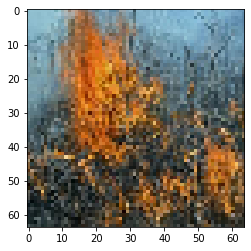

Forest fire
SM8baf6e702818d6a7f9e9d0e671c4aebf
Fire detected
SMS Sent!


In [44]:
from matplotlib import pyplot as plt
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/content/drive/MyDrive/Dataset Collection/test/FIRE_316.jpg',target_size=(64,64))
Y = image.img_to_array(img1)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img1)
plt.show()
message(val)

Image 2

1/1 [==============================] - 0s 33ms/step


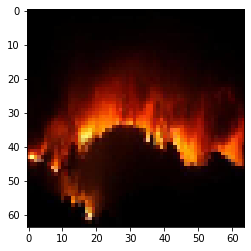

Forest fire
SMd327642b98f570e80891ce7381a8cc02
Fire detected
SMS Sent!


In [49]:
img2 = image.load_img('/content/drive/MyDrive/Dataset Collection/test/FIRE_304.jpg',target_size=(64,64))
Y = image.img_to_array(img2)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img2)
plt.show()
message(val)